# ExoplanetIA

In [1]:
#Activamos el autoreload por si hacemos cambios en algun modulo
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import *

In [3]:
PATH = "./datos/"
TRAIN_FILE = "exoTrain.csv"
TEST_FILE = "exoTest.csv"

In [4]:
#leemos los datos de ambos datasets
df_train_raw = pd.read_csv(f'{PATH}{TRAIN_FILE}', low_memory=False)
df_test_raw = pd.read_csv(f'{PATH}{TEST_FILE}', low_memory=False)

In [5]:
#Damos un vistazo a los valores
df_train_raw.head().T

,0,1,2,3,4
LABEL,2.00,2.00,2.00,2.00,2.00
FLUX.1,93.85,-38.88,532.64,326.52,-1107.21
FLUX.2,83.81,-33.83,535.92,347.39,-1112.59
FLUX.3,20.10,-58.54,513.73,302.35,-1118.95
FLUX.4,-26.98,-40.09,496.92,298.13,-1095.10
...,...,...,...,...,...
FLUX.3193,92.54,0.76,5.06,-12.67,-438.54
FLUX.3194,39.32,-11.70,-11.80,-8.77,-399.71
FLUX.3195,61.42,6.46,-28.91,-17.31,-384.65
FLUX.3196,5.08,16.00,-70.02,-17.35,-411.79


In [6]:
#Comprobamos la cantidad de valores negativos (no hay exoplaneta, LABEL = 1) y 
#positivos (si hay exoplaneta, LABEL = 2) y su proporción

print(df_train_raw['LABEL'].value_counts())
print(df_train_raw['LABEL'].value_counts(normalize = True))
print(df_test_raw['LABEL'].value_counts())
print(df_test_raw['LABEL'].value_counts(normalize = True))

1    5050
2      37
Name: LABEL, dtype: int64
1    0.992727
2    0.007273
Name: LABEL, dtype: float64
1    565
2      5
Name: LABEL, dtype: int64
1    0.991228
2    0.008772
Name: LABEL, dtype: float64


Aunque la proporción de datos positivos en el dataset de test es superior a la del dataset de entrenamiento no es una diferencia significativa.

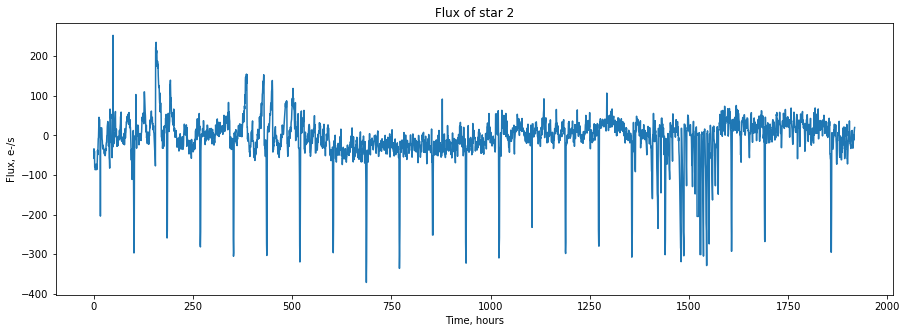

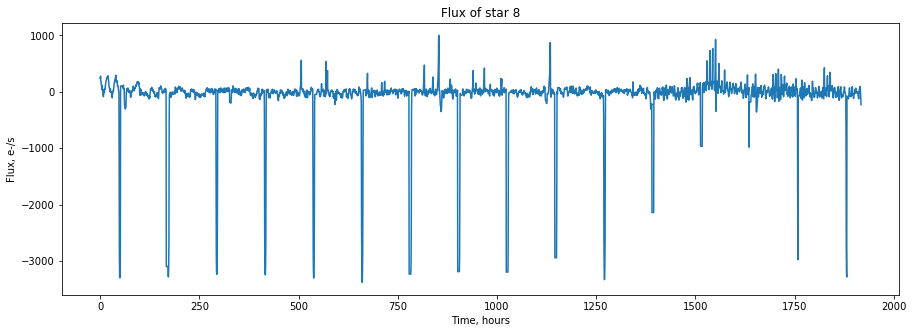

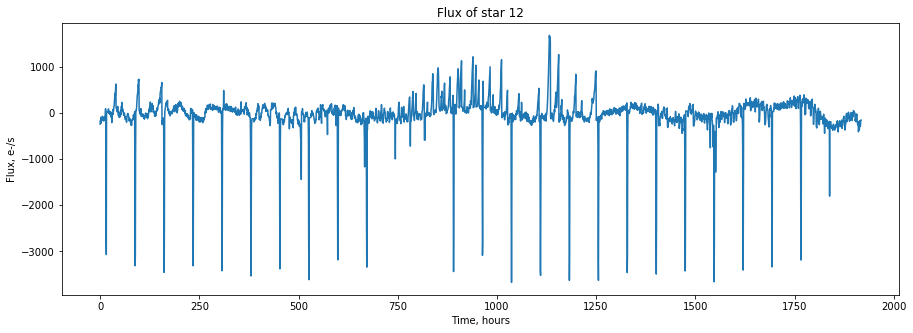

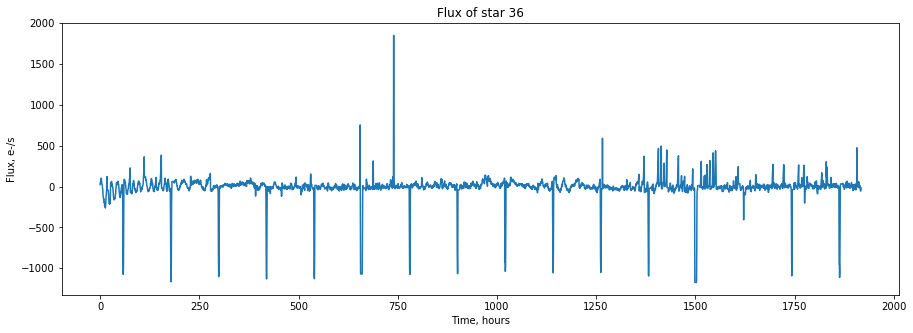

In [7]:
# algunas graficas de estrellas con planetas
df = df_train_raw.drop('LABEL', axis = 1)
show_flux_plot(df, [1, 7, 11, 35])

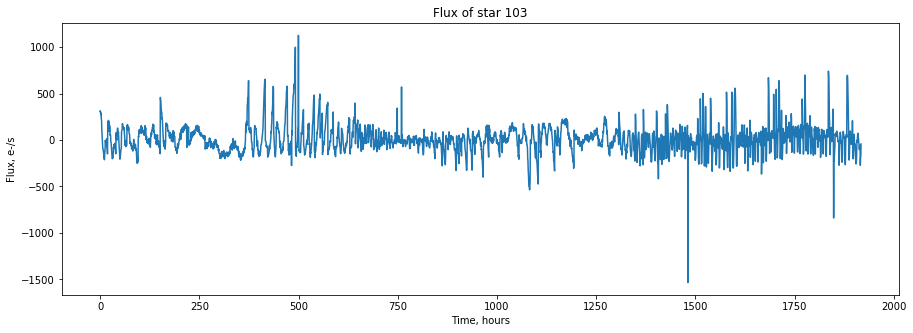

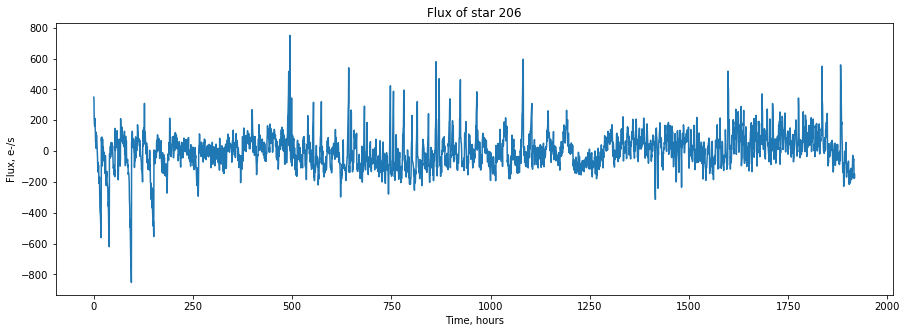

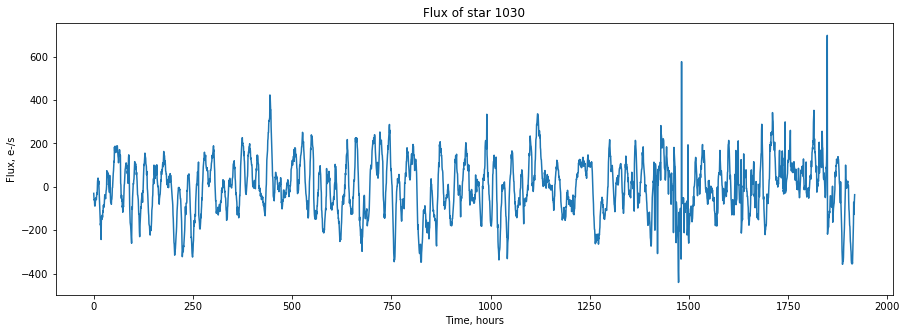

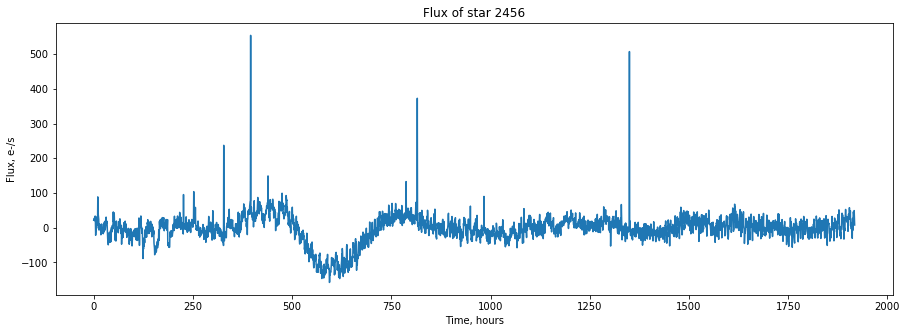

In [8]:
# algunas graficas de estrellas sin planetas
show_flux_plot(df, [102, 205, 1029, 2455])

Vemos en algunos casos, como en las estrellas 36, 1030 o 2456, picos puntuales de intensidad de luz. Esta es una circunstancia extraña, ya que el brillo de una estrella suele permanecer relativamente estable. Y desde luego no es debido al transito de una planeta, ya que esto reduciria el valor, como se aprecia en los picos descendentes de las primeras graficas. 

Asi pues, lo mas probable es que estos valores sean errores y lo mejor será descartarlos. Esto es especialmente importante si vamos a normalizar usando la tecnica de min-max scaling, muy sensible a valores extremos.

In [9]:
df_train_raw.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [10]:
df_train_normalized = z_score_normalizing(df_train_raw)
df_test_normalized = z_score_normalizing(df_test_raw)

In [11]:
validation_proportion = 0.2
df_train, df_validation = split_train_df(df_train_normalized, validation_proportion)

In [12]:
train_x, train_y = generate_x_y_df(df_train)
validation_x, validation_y = generate_x_y_df(df_validation)
test_x, test_y = generate_x_y_df(df_test_normalized)

In [13]:
train_x.shape, train_y.shape, validation_x.shape, validation_y.shape

((4070, 3197), (4070,), (1017, 3197), (1017,))